### **Analisis de los datos de un hotel**

En el siguiente notebook se realiza una limpieza y posterior análisis de los datos de un hotel.

El dataset utilizado se encuentra disponible en kaggle: 
https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand

### **1. Importación del dataset**

En esta sección de importan las librerias necesarias y se carga el dataset

In [1]:
# importacion de las librerias 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
# importar datos y convertir a df
df = pd.read_csv('hotel_bookings.csv')
df.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,No Deposit,NaN,NaN,0,Transient,107.0,0,0,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,No Deposit,303.0,NaN,0,Transient,103.0,0,1,Check-Out,2015-07-03
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,2015-04-22


In [3]:
# info del df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

### **2. Limpieza del dataframe**

En esta sección del notebook, se procede a realizar una limpieza de los datos. 

Los procesos realizados son: identificar los valores duplicados, cambiar los tipos de datos objeto al tipo correcto, identificar valores nulos y rellenar datos faltantes en caso de ser necesario.

### **2.1. Cambiar tipos de datos**

Se observa que varias columnas del dataframe son identificadas del tipo 'object'. En la siguiente sección se realiza el proceso de cambiarlas al tipo 'string' utilizando el metodo astype. Fuente: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.astype.html   

In [4]:
# tipos de datos del dataframe
print("Los tipos de datos del dataframe son:")
print(df.dtypes)

Los tipos de datos del dataframe son:
hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       obj

In [5]:
# object a string
df = df.astype({col: 'string' for col in df.select_dtypes(include='object').columns})
print('Los tipos de datos del dataframe ahora son:')
print(df.dtypes)

Los tipos de datos del dataframe ahora son:
hotel                             string[python]
is_canceled                                int64
lead_time                                  int64
arrival_date_year                          int64
arrival_date_month                string[python]
arrival_date_week_number                   int64
arrival_date_day_of_month                  int64
stays_in_weekend_nights                    int64
stays_in_week_nights                       int64
adults                                     int64
children                                 float64
babies                                     int64
meal                              string[python]
country                           string[python]
market_segment                    string[python]
distribution_channel              string[python]
is_repeated_guest                          int64
previous_cancellations                     int64
previous_bookings_not_canceled             int64
reserved_room_type       

In [6]:
# string a date
df['reservation_status_date']=pd.to_datetime(df['reservation_status_date'])
print(df.dtypes)

hotel                             string[python]
is_canceled                                int64
lead_time                                  int64
arrival_date_year                          int64
arrival_date_month                string[python]
arrival_date_week_number                   int64
arrival_date_day_of_month                  int64
stays_in_weekend_nights                    int64
stays_in_week_nights                       int64
adults                                     int64
children                                 float64
babies                                     int64
meal                              string[python]
country                           string[python]
market_segment                    string[python]
distribution_channel              string[python]
is_repeated_guest                          int64
previous_cancellations                     int64
previous_bookings_not_canceled             int64
reserved_room_type                string[python]
assigned_room_type  

### **2.2. Identificacion de outliers**

Valores como estadia de 1000 noches

In [8]:
# outlier en estadia
print('Estadia superior a 366 noches (1 año): ')
print(df[df['stays_in_weekend_nights']>366])

Estadia superior a 366 noches (1 año): 
Empty DataFrame
Columns: [hotel, is_canceled, lead_time, arrival_date_year, arrival_date_month, arrival_date_week_number, arrival_date_day_of_month, stays_in_weekend_nights, stays_in_week_nights, adults, children, babies, meal, country, market_segment, distribution_channel, is_repeated_guest, previous_cancellations, previous_bookings_not_canceled, reserved_room_type, assigned_room_type, booking_changes, deposit_type, agent, company, days_in_waiting_list, customer_type, adr, required_car_parking_spaces, total_of_special_requests, reservation_status, reservation_status_date]
Index: []

[0 rows x 32 columns]


In [9]:
# outlier en estadia
print('Estadia superior a 366 noches (1 año): ')
print(df[df['stays_in_week_nights']>366])

Estadia superior a 366 noches (1 año): 
Empty DataFrame
Columns: [hotel, is_canceled, lead_time, arrival_date_year, arrival_date_month, arrival_date_week_number, arrival_date_day_of_month, stays_in_weekend_nights, stays_in_week_nights, adults, children, babies, meal, country, market_segment, distribution_channel, is_repeated_guest, previous_cancellations, previous_bookings_not_canceled, reserved_room_type, assigned_room_type, booking_changes, deposit_type, agent, company, days_in_waiting_list, customer_type, adr, required_car_parking_spaces, total_of_special_requests, reservation_status, reservation_status_date]
Index: []

[0 rows x 32 columns]


### **2.3. Identificar valores únicos en columnas del dataframe**

En esta sección se identifican los valores únicos en columnas del dataframe, con intenciones de encontrar inconsistencias entre mayusculas y minusculas para una misma palabra. Por ejemplo: 'yes', 'YES', 'YeS'. 

In [10]:
# valores duplicados
duplicados = df.duplicated()

# contar el número de duplicados
num_duplicados = duplicados.sum()
print(f"Número de registros duplicados: {num_duplicados}")

Número de registros duplicados: 31994


In [11]:
# únicos en la columna hotel
print(df['hotel'].unique())

<StringArray>
['Resort Hotel', 'City Hotel']
Length: 2, dtype: string


In [12]:
# únicos en la columna arrival date month
print(df['arrival_date_month'].unique())

<StringArray>
[     'July',    'August', 'September',   'October',  'November',  'December',
   'January',  'February',     'March',     'April',       'May',      'June']
Length: 12, dtype: string


In [13]:
# únicos en la columna meal
print(df['meal'].unique())

<StringArray>
['BB', 'FB', 'HB', 'SC', 'Undefined']
Length: 5, dtype: string


In [14]:
# únicos en la columna market_segment
print(df['market_segment'].unique())

<StringArray>
[       'Direct',     'Corporate',     'Online TA', 'Offline TA/TO',
 'Complementary',        'Groups',     'Undefined',      'Aviation']
Length: 8, dtype: string


In [15]:
# únicos en la columna distribution_channel
print(df['distribution_channel'].unique())

<StringArray>
['Direct', 'Corporate', 'TA/TO', 'Undefined', 'GDS']
Length: 5, dtype: string


In [16]:
# únicos en la columna reserved_room_type
print(df['reserved_room_type'].unique())

<StringArray>
['C', 'A', 'D', 'E', 'G', 'F', 'H', 'L', 'P', 'B']
Length: 10, dtype: string


In [17]:
# únicos en la columna assigned_room_type
print(df['assigned_room_type'].unique())

<StringArray>
['C', 'A', 'D', 'E', 'G', 'F', 'I', 'B', 'H', 'P', 'L', 'K']
Length: 12, dtype: string


In [18]:
# únicos en la columna deposit_type 
print(df['deposit_type'].unique())

<StringArray>
['No Deposit', 'Refundable', 'Non Refund']
Length: 3, dtype: string


### **2.4. Manejo de valores faltantes**

En esta sección se analiza los valores faltantes en las columnas y se buscan métodos para rellenarlos en caso de ser necesario

In [19]:
# identificacion de datos faltantes con funcion proporcionada en clase
# cantidad de datos completos, sin NA, es decir, el total de datos
qsna=df.shape[0]-df.isnull().sum(axis=0)
# cantidad de datos que si son na
qna=df.isnull().sum(axis=0)
# proporcion de datos con na y sin na
ppna=round(100*(df.isnull().sum(axis=0)/df.shape[0]),2)
# constuir la tab
aux= {'datos sin NAs en q': qsna, 'Na en q': qna ,'Na en %': ppna}
na=pd.DataFrame(data=aux)
# ordenar los valores de la tabla
na.sort_values(by='Na en %',ascending=False)

,datos sin NAs en q,Na en q,Na en %
company,6797,112593,94.31
agent,103050,16340,13.69
country,118902,488,0.41
hotel,119390,0,0.00
previous_cancellations,119390,0,0.00
reservation_status,119390,0,0.00
total_of_special_requests,119390,0,0.00
required_car_parking_spaces,119390,0,0.00
adr,119390,0,0.00
customer_type,119390,0,0.00


In [20]:
# NA de company
df.loc[df.isnull()['company']]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


En el dataset se observa que la mayor cantidad de valores faltantes se encuentran en la columna "company". Para lo cual se busca una tendencia a modo de inferir los valores de los datos faltantes. 

A continuación, se buscan los valores únicos de la columna "company" y se ordenan. 

In [21]:
# valores de company
print(np.sort(df['company'].unique()))
print(type(df['company'].unique()))

[  6.   8.   9.  10.  11.  12.  14.  16.  18.  20.  22.  28.  29.  31.
  32.  34.  35.  37.  38.  39.  40.  42.  43.  45.  46.  47.  48.  49.
  51.  52.  53.  54.  59.  61.  62.  64.  65.  67.  68.  71.  72.  73.
  76.  77.  78.  80.  81.  82.  83.  84.  85.  86.  88.  91.  92.  93.
  94.  96.  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110.
 112. 113. 115. 116. 118. 120. 122. 126. 127. 130. 132. 135. 137. 139.
 140. 142. 143. 144. 146. 148. 149. 150. 153. 154. 158. 159. 160. 163.
 165. 167. 168. 169. 174. 178. 179. 180. 183. 184. 185. 186. 192. 193.
 195. 197. 200. 202. 203. 204. 207. 209. 210. 212. 213. 215. 216. 217.
 218. 219. 220. 221. 222. 223. 224. 225. 227. 229. 230. 232. 233. 234.
 237. 238. 240. 242. 243. 245. 246. 250. 251. 253. 254. 255. 257. 258.
 259. 260. 263. 264. 268. 269. 270. 271. 272. 273. 274. 275. 277. 278.
 279. 280. 281. 282. 284. 286. 287. 288. 289. 290. 291. 292. 293. 297.
 301. 302. 304. 305. 307. 308. 309. 311. 312. 313. 314. 316. 317. 318.
 319. 

A continuación se busca la cantidad de valores repetidos en la columna "company"

In [22]:
# duplicados en company
df.groupby('company').size().reset_index(name='repetidos')

,company,repetidos
0,6.0,1
1,8.0,1
2,9.0,37
3,10.0,1
4,11.0,1
...,...,...
347,531.0,1
348,534.0,2
349,539.0,2
350,541.0,1


Se buscan los valores nulos de la columna "agent"

In [23]:
# NA de agent
df.loc[df.isnull()['agent']]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,No Deposit,NaN,NaN,0,Transient,107.00,0,0,Check-Out,2015-07-03
18,Resort Hotel,0,0,2015,July,27,1,0,1,2,...,No Deposit,NaN,110.0,0,Transient,107.42,0,0,Check-Out,2015-07-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119124,City Hotel,0,0,2017,August,35,29,0,1,1,...,No Deposit,NaN,72.0,0,Transient,0.00,0,2,Check-Out,2017-08-30
119151,City Hotel,0,0,2017,August,35,29,0,1,2,...,No Deposit,NaN,NaN,0,Transient,270.00,0,0,Check-Out,2017-08-30
119166,City Hotel,0,0,2017,August,35,30,0,1,1,...,No Deposit,NaN,NaN,0,Transient,140.00,0,0,Check-Out,2017-08-31
119215,City Hotel,0,2,2017,August,35,31,0,1,1,...,No Deposit,NaN,NaN,0,Transient,140.00,0,2,Check-Out,2017-09-01


Se buscan los valores únicos de la columna "agent" y se ordenan respectivamente, a modo de encontrar algún patrón que logre inferir los datos faltantes.

In [24]:
# valores de agent
print(np.sort(df['agent'].unique()))
print(type(df['agent'].unique()))

[  1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.
  15.  16.  17.  19.  20.  21.  22.  23.  24.  25.  26.  27.  28.  29.
  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.  42.  44.
  45.  47.  50.  52.  53.  54.  55.  56.  57.  58.  59.  60.  61.  63.
  64.  66.  67.  68.  69.  70.  71.  72.  73.  74.  75.  77.  78.  79.
  81.  82.  83.  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.
  96.  98.  99. 103. 104. 105. 106. 107. 110. 111. 112. 114. 115. 117.
 118. 119. 121. 122. 126. 127. 128. 129. 132. 133. 134. 135. 138. 139.
 141. 142. 143. 144. 146. 147. 148. 149. 150. 151. 152. 153. 154. 155.
 156. 157. 158. 159. 162. 163. 165. 167. 168. 170. 171. 173. 174. 175.
 177. 179. 180. 181. 182. 183. 184. 185. 187. 191. 192. 193. 195. 196.
 197. 201. 205. 208. 210. 211. 213. 214. 215. 216. 219. 220. 223. 227.
 229. 232. 234. 235. 236. 240. 241. 242. 243. 244. 245. 247. 248. 249.
 250. 251. 252. 253. 254. 256. 257. 258. 261. 262. 265. 267. 269. 270.
 273. 

Como los datos de la columna "agent" y "company" representan un identificador de agencia y compañia, se optó por la idea de rellenar los datos faltantes en las columnas con intercambios. Es decir, si por ejemplo, una fila del dataset contiene la variable "company" pero no "agent", se puede rellenar el faltante igualando al valor de "agent". Por tanto, en la siguiente porción de código se busca identificar si existe algún registro en el que la columna "company" sea igual a la de "agent", si la suma da 0, entonces significa que si puede usarse como método de relleno.

In [25]:
# comparacion entre datos entre company y agent 
comparacion = df[df['company'].notna()][['company', 'agent']]
print(comparacion)

# filas que no son NAN en agent 
filas_not_nan_agent = comparacion['agent'].count()

# cantidad de datos que se repiten 
print(6797-filas_not_nan_agent)

        company  agent
18        110.0    NaN
218       110.0    NaN
219       110.0    NaN
220       110.0    NaN
295       113.0    NaN
...         ...    ...
119119    451.0    NaN
119122    451.0    NaN
119123    451.0    NaN
119124     72.0    NaN
119248    485.0    NaN

[6797 rows x 2 columns]
6580


Como la diferencia entre valores totales y valores que no son Nan es distinto de cero, la idea anterior queda descartada. 

Según el paper de donde se obtuvo el dataset (https://www.sciencedirect.com/science/article/pii/S2352340918315191#tbl1fna), los datos de "company" y "agent" son variables categóricos, que se definen como identificadores únicos asociados a la base de datos, y no representan a una misma "entidad". Por tanto, resulta imposible inferir los valores de "company". 

Dadas las circunstancias, se toma la decisión de mantener los valores de "company" a pesar de los datos faltantes y no serán utilizados para realizar cálculos posteriormente. 

En el caso de los datos en la columna "agent", los valores faltantes son significativamente menores, por tanto se rellenaran los faltantes con un identificador único que será el 0, que significaría que el agente es desconocido. Se opta por usar el número 0 a modo de mantener los tipos de datos de esta columna, que es del tipo float. 

In [26]:
# faltantes de agent se rellena con 0 
df['agent'] = df['agent'].fillna(0)

# sin nulos
df.loc[df.isnull()['agent']]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date


In [27]:
# identificacion de datos faltantes con funcion proporcionada en clase
# cantidad de datos completos, sin NA, es decir, el total de datos
qsna=df.shape[0]-df.isnull().sum(axis=0)
# cantidad de datos que si son na
qna=df.isnull().sum(axis=0)
# proporcion de datos con na y sin na
ppna=round(100*(df.isnull().sum(axis=0)/df.shape[0]),2)
# constuir la tab
aux= {'datos sin NAs en q': qsna, 'Na en q': qna ,'Na en %': ppna}
na=pd.DataFrame(data=aux)
# ordenar los valores de la tabla
na.sort_values(by='Na en %',ascending=False)

,datos sin NAs en q,Na en q,Na en %
company,6797,112593,94.31
country,118902,488,0.41
hotel,119390,0,0.00
previous_cancellations,119390,0,0.00
reservation_status,119390,0,0.00
total_of_special_requests,119390,0,0.00
required_car_parking_spaces,119390,0,0.00
adr,119390,0,0.00
customer_type,119390,0,0.00
days_in_waiting_list,119390,0,0.00


In [28]:
# NA de country
df.loc[df.isnull()['country']]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
30,Resort Hotel,0,118,2015,July,27,1,4,10,1,...,No Deposit,0.0,NaN,0,Transient,62.0,0,2,Check-Out,2015-07-15
4127,Resort Hotel,1,0,2016,February,8,15,0,0,0,...,No Deposit,0.0,383.0,0,Transient,0.0,0,0,Canceled,2016-02-15
7092,Resort Hotel,1,8,2016,July,30,21,0,1,1,...,No Deposit,0.0,204.0,0,Transient,73.0,0,2,Canceled,2016-07-20
7860,Resort Hotel,1,39,2016,August,36,30,0,5,2,...,No Deposit,0.0,NaN,0,Transient,159.0,0,5,Canceled,2016-07-22
8779,Resort Hotel,1,0,2016,October,42,13,0,1,1,...,No Deposit,0.0,457.0,0,Transient,50.0,0,0,Canceled,2016-10-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65908,City Hotel,1,0,2017,April,15,10,0,0,0,...,No Deposit,0.0,279.0,0,Transient,0.0,0,0,Canceled,2017-04-10
65909,City Hotel,1,0,2017,April,15,10,0,0,0,...,No Deposit,0.0,279.0,0,Transient,0.0,0,0,Canceled,2017-04-10
65910,City Hotel,1,0,2017,April,15,10,0,0,0,...,No Deposit,0.0,279.0,0,Transient,0.0,0,0,Canceled,2017-04-10
80830,City Hotel,0,4,2015,November,48,23,1,2,1,...,No Deposit,37.0,NaN,0,Transient-Party,70.0,0,0,Check-Out,2015-11-26


In [29]:
# valores de country
print(df['country'].unique())

<StringArray>
['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA',  <NA>, 'ROU', 'NOR', 'OMN',
 ...
 'ATA', 'GTM', 'ASM', 'MRT', 'NCL', 'KIR', 'SDN', 'ATF', 'SLE', 'LAO']
Length: 178, dtype: string


Los valores de la columna "country" son del tipo string. Se repite el caso anterior, en el que inferir el valor de los datos faltantes resulta casi imposible, por lo que se opta por completar los datos con las siglas "uknw" (unknown = desconocido)

In [30]:
# faltantes de agent se rellena con 0 
df['country'] = df['country'].fillna('uknw')

# sin nulos
df.loc[df.isnull()['country']]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date


In [31]:
# identificacion de datos faltantes con funcion proporcionada en clase
# cantidad de datos completos, sin NA, es decir, el total de datos
qsna=df.shape[0]-df.isnull().sum(axis=0)
# cantidad de datos que si son na
qna=df.isnull().sum(axis=0)
# proporcion de datos con na y sin na
ppna=round(100*(df.isnull().sum(axis=0)/df.shape[0]),2)
# constuir la tab
aux= {'datos sin NAs en q': qsna, 'Na en q': qna ,'Na en %': ppna}
na=pd.DataFrame(data=aux)
# ordenar los valores de la tabla
na.sort_values(by='Na en %',ascending=False)

,datos sin NAs en q,Na en q,Na en %
company,6797,112593,94.31
hotel,119390,0,0.00
is_canceled,119390,0,0.00
reservation_status,119390,0,0.00
total_of_special_requests,119390,0,0.00
required_car_parking_spaces,119390,0,0.00
adr,119390,0,0.00
customer_type,119390,0,0.00
days_in_waiting_list,119390,0,0.00
agent,119390,0,0.00


In [32]:
# NA de children
df.loc[df.isnull()['children']]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
40600,City Hotel,1,2,2015,August,32,3,1,0,2,...,No Deposit,0.0,NaN,0,Transient-Party,12.0,0,1,Canceled,2015-08-01
40667,City Hotel,1,1,2015,August,32,5,0,2,2,...,No Deposit,14.0,NaN,0,Transient-Party,12.0,0,1,Canceled,2015-08-04
40679,City Hotel,1,1,2015,August,32,5,0,2,3,...,No Deposit,0.0,NaN,0,Transient-Party,18.0,0,2,Canceled,2015-08-04
41160,City Hotel,1,8,2015,August,33,13,2,5,2,...,No Deposit,9.0,NaN,0,Transient-Party,76.5,0,1,Canceled,2015-08-09


In [33]:
# faltantes de children se rellena con 0 
df['children'] = df['children'].fillna('0')

# sin nulos
df.loc[df.isnull()['children']]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date


In [34]:
# float a int en children
df['children'] = df['children'].astype(int)
print(df.dtypes)

hotel                             string[python]
is_canceled                                int64
lead_time                                  int64
arrival_date_year                          int64
arrival_date_month                string[python]
arrival_date_week_number                   int64
arrival_date_day_of_month                  int64
stays_in_weekend_nights                    int64
stays_in_week_nights                       int64
adults                                     int64
children                                   int32
babies                                     int64
meal                              string[python]
country                           string[python]
market_segment                    string[python]
distribution_channel              string[python]
is_repeated_guest                          int64
previous_cancellations                     int64
previous_bookings_not_canceled             int64
reserved_room_type                string[python]
assigned_room_type  

In [35]:
# identificacion de datos faltantes con funcion proporcionada en clase
# cantidad de datos completos, sin NA, es decir, el total de datos
qsna=df.shape[0]-df.isnull().sum(axis=0)
# cantidad de datos que si son na
qna=df.isnull().sum(axis=0)
# proporcion de datos con na y sin na
ppna=round(100*(df.isnull().sum(axis=0)/df.shape[0]),2)
# constuir la tab
aux= {'datos sin NAs en q': qsna, 'Na en q': qna ,'Na en %': ppna}
na=pd.DataFrame(data=aux)
# ordenar los valores de la tabla
na.sort_values(by='Na en %',ascending=False)

,datos sin NAs en q,Na en q,Na en %
company,6797,112593,94.31
hotel,119390,0,0.00
is_canceled,119390,0,0.00
reservation_status,119390,0,0.00
total_of_special_requests,119390,0,0.00
required_car_parking_spaces,119390,0,0.00
adr,119390,0,0.00
customer_type,119390,0,0.00
days_in_waiting_list,119390,0,0.00
agent,119390,0,0.00


Así, el dataset queda "limpio" en la medida en que se podía. Se destaca nuevamente que la columna "company" se decidió mantenerla sin rellenar por la cantidad de datos faltantes (más del 90%) y por la naturaleza de dicho dato, el cual es un dato categórico y único, que no puede ser inferido.

Se crea un dataframe con sin la columna "company" para fines practicos.

In [36]:
# nuevo df
df2 = df.drop('company', axis=1)
df2.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,3,No Deposit,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,4,No Deposit,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,No Deposit,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,No Deposit,304.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,0,No Deposit,0.0,0,Transient,107.0,0,0,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,0,No Deposit,303.0,0,Transient,103.0,0,1,Check-Out,2015-07-03
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,0,No Deposit,240.0,0,Transient,82.0,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,0,No Deposit,15.0,0,Transient,105.5,0,0,Canceled,2015-04-22


### **3. Exploracion de los datos**

In [37]:
# estadisticas del df
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,...,119390.000000,119390.000000,119390.000000,119390.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103886,0.007949,...,0.087118,0.137097,0.221124,74.828319,189.266735,2.321149,101.831122,0.062518,0.571363,2016-07-30 00:24:47.883407104
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,-6.380000,0.000000,0.000000,2014-10-17 00:00:00
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,7.000000,62.000000,0.000000,69.290000,0.000000,0.000000,2016-02-01 00:00:00
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,9.000000,179.000000,0.000000,94.575000,0.000000,0.000000,2016-08-07 00:00:00
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,152.000000,270.000000,0.000000,126.000000,0.000000,1.000000,2017-02-08 00:00:00
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,...,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000,2017-09-14 00:00:00
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398555,0.097436,...,0.844336,1.497437,0.652306,107.141953,131.655015,17.594721,50.535790,0.245291,0.792798,NaN


In [38]:
# shape del df
df.shape

(119390, 32)

### **3.1 Gráfico de tarifa promedio por tipo de hotel**

In [39]:
# agrupado por tipo de hotel
df_grouped = df.groupby('hotel')['adr'].mean().reset_index()

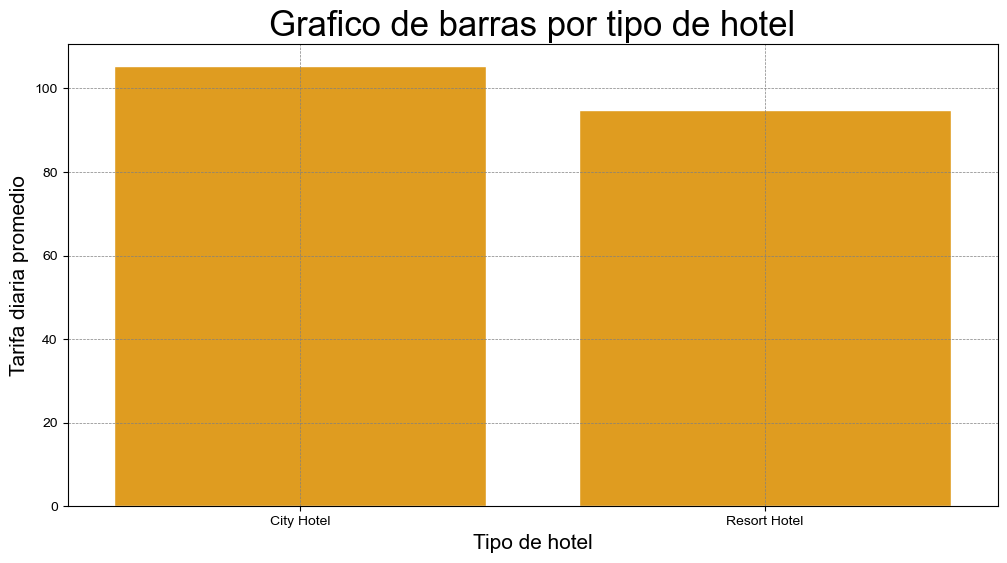

In [40]:
# crear figura y eje
fig, ax = plt.subplots(figsize=(12, 6))

# creacion de histograma de tipo de hotel
sns.barplot(data=df_grouped, x='hotel', y='adr', color='orange', edgecolor='white')
ax.set_title('Grafico de barras por tipo de hotel', fontsize=25)
ax.set_xlabel('Tipo de hotel', fontsize=15)
ax.set_ylabel('Tarifa diaria promedio', fontsize=15)
sns.set_style("darkgrid")

# añadir cuadrícula
ax.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray')

# mostrar el gráfico
plt.show()


Se puede observar a traves del gráfico de barras que las tarifas promedio en hoteles de ciudad son más elevadas que los hoteles del tipo resort. Tal vez esta diferencia pueda ser debido a que los hoteles en ciudad generalmente atraen mayor cantidad de ejecutivos y turistas, además se encuentran en buenas localidades, generalmente en áreas metropolitanas o ciudades capitales altamente concurridas, y eso eleva también el precio de las tarifas a diferencia de los hoteles del tipo resort, que se ubican a afueras de las ciudades y su fin es más recreativo.

### **3.2 Gráfico de cantidad de adultos y niños por tipo de hotel**

In [41]:
# contar niños y adultos por tipo de hotel
df_grouped = df.groupby('hotel')[['children', 'adults']].sum().reset_index()
print(df_grouped)

          hotel  children  adults
0    City Hotel      7248  146838
1  Resort Hotel      5155   74798


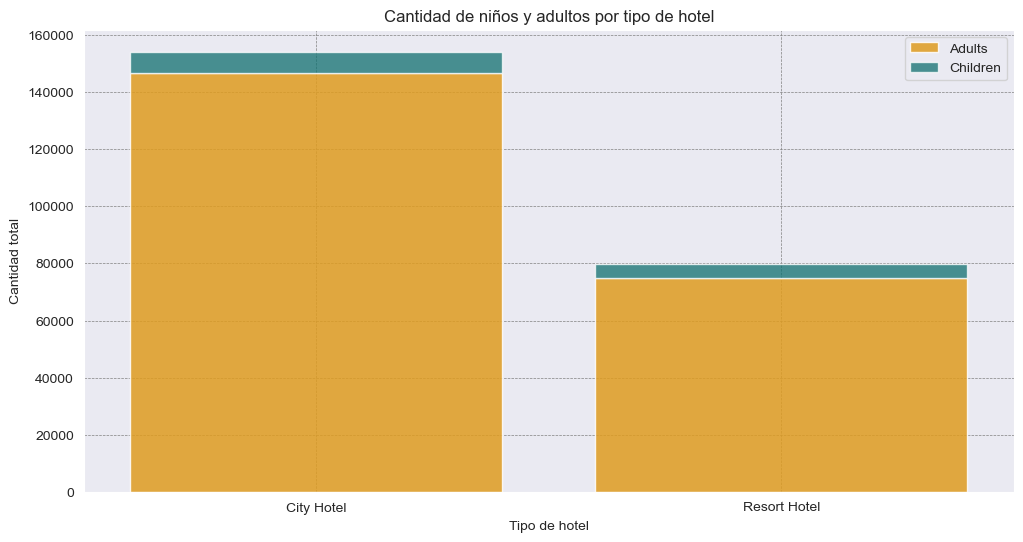

In [42]:
# crear figura y eje
fig, ax = plt.subplots(figsize=(12, 6))

# grafico de barras para adultos
sns.barplot(data=df_grouped, x='hotel', y='adults', color='orange', label='Adults', alpha=0.85)

# grafico de barras para niños
sns.barplot(data=df_grouped, x='hotel', y='children', color='teal', label='Children', bottom=df_grouped['adults'], alpha=0.75)

# añadir cuadrícula
ax.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray')

# etiquetas y titulo
plt.xlabel('Tipo de hotel')
plt.ylabel('Cantidad total')
plt.title('Cantidad de niños y adultos por tipo de hotel')
plt.legend()

# mostrar grafico
plt.show()

En el gráfico se identifica rápidamente que la cantidad de personas que concurren a un hotel de ciudad es considerablemente mayor en comparación a los resort. Una deducción de esto podía ser que los hoteles de ciudad se encuentran activos todo el año, ya que turistas y ejecutivos visitan este tipo de hoteles durante todo el año, sin embargo, en el caso de los resort, su temporada es más estacional, aumentando sus visitas en el periodo de vacaciones. Otro punto importante a destacar de este gráfico es que la cantidad de niños en los hoteles es mucho menor que la cantidad de adultos y se nota una ligera mayor concurrencia de niños en los hoteles de ciudad que en los resort. 

### **3.3. Histograma de meses**

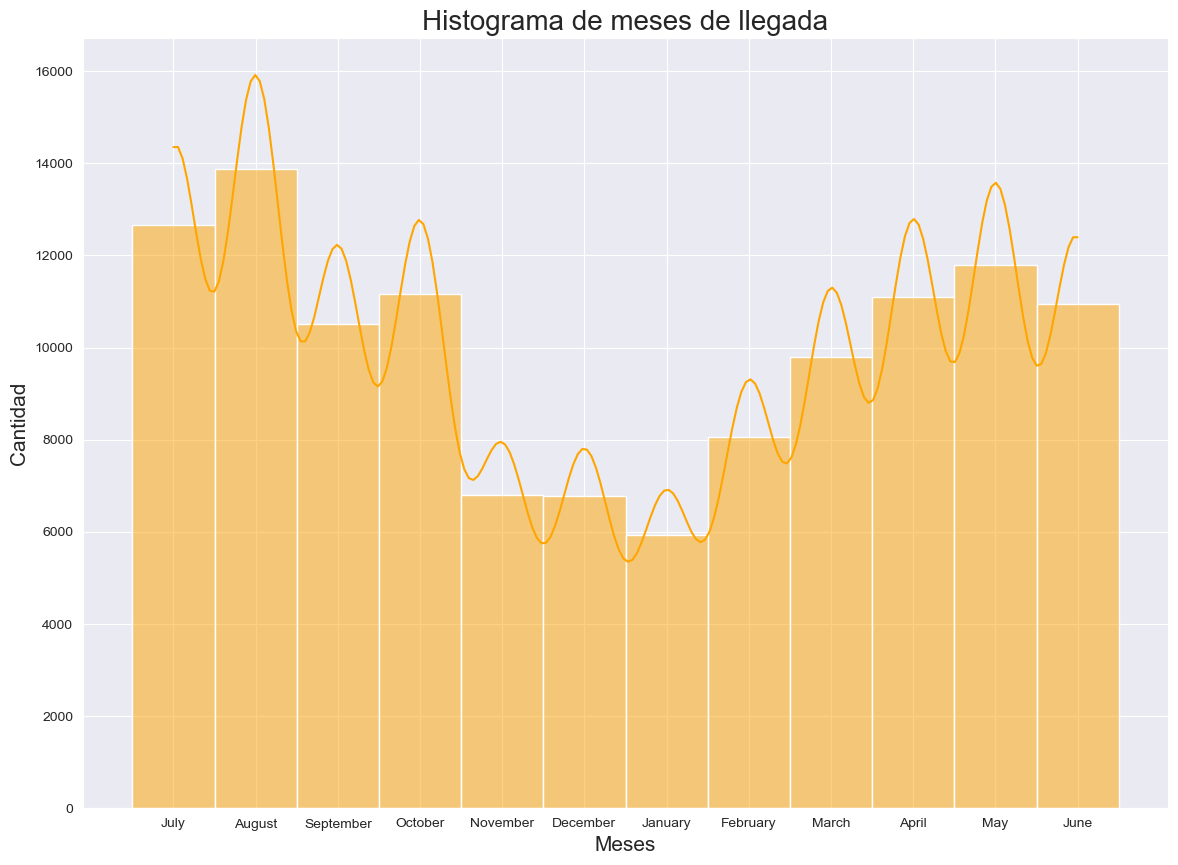

In [43]:
# crear figura y eje   
fig, ax = plt.subplots(figsize=(14, 10))

# creacion de histograma meses de llegada 
sns.histplot(data=df, x='arrival_date_month', kde=True, color='orange', edgecolor='white')
ax.set_title('Histograma de meses de llegada', fontsize=20) 
ax.set_xlabel('Meses', fontsize=15)
ax.set_ylabel('Cantidad', fontsize=15)
sns.set_style("darkgrid")

plt.show()

En el histograma se logra identificar la distribución de los datos. Se observa que los meses con mayor cantidad de llegadas a los hoteles es entre mayo y agosto, mientras que los mínimos se dan en el trimestre de noviembre, diciembre y enero. 

### **3.3. Gráfico de barras por tipo de visita y hotel**

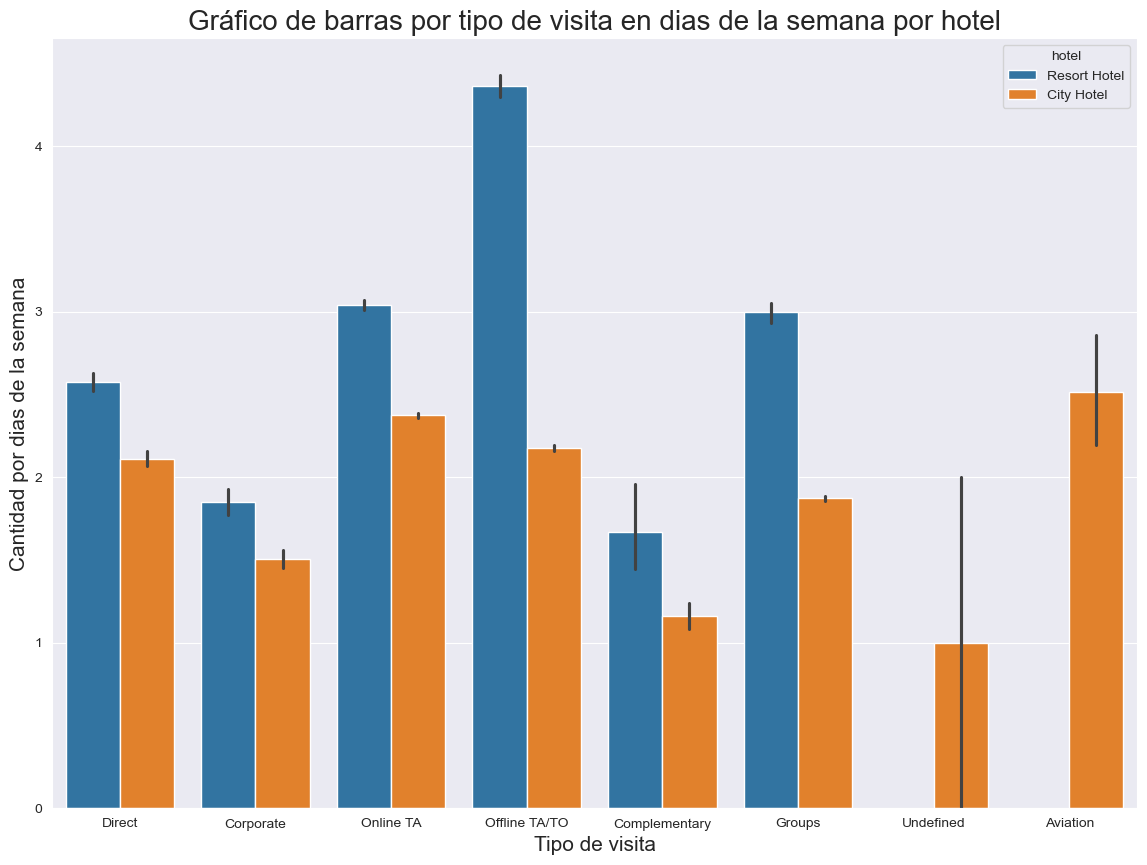

In [44]:
# crear figura y eje
fig, ax = plt.subplots(figsize=(14, 10))

# gráfco de barras
sns.barplot(data=df, x='market_segment', y='stays_in_week_nights', hue='hotel')

# titulos
ax.set_title('Gráfico de barras por tipo de visita en dias de la semana por hotel', fontsize=20) 
ax.set_xlabel('Tipo de visita', fontsize=15)
ax.set_ylabel('Cantidad por dias de la semana', fontsize=15)
sns.set_style("darkgrid")

plt.show()

En el gráfico se compara las visitas que se tienen entre dias laborales de la semana por tipo motivo de visita y por tipo de hotel. Se ve que la cantidad de visitas a hoteles del tipo resort es mayor, mientas que la cantidad en hoteles de ciudad es menor. Se nota un máximo en la categoría offline en los hoteles del tipo resort, es decir, aquellos de van de vacaciones.

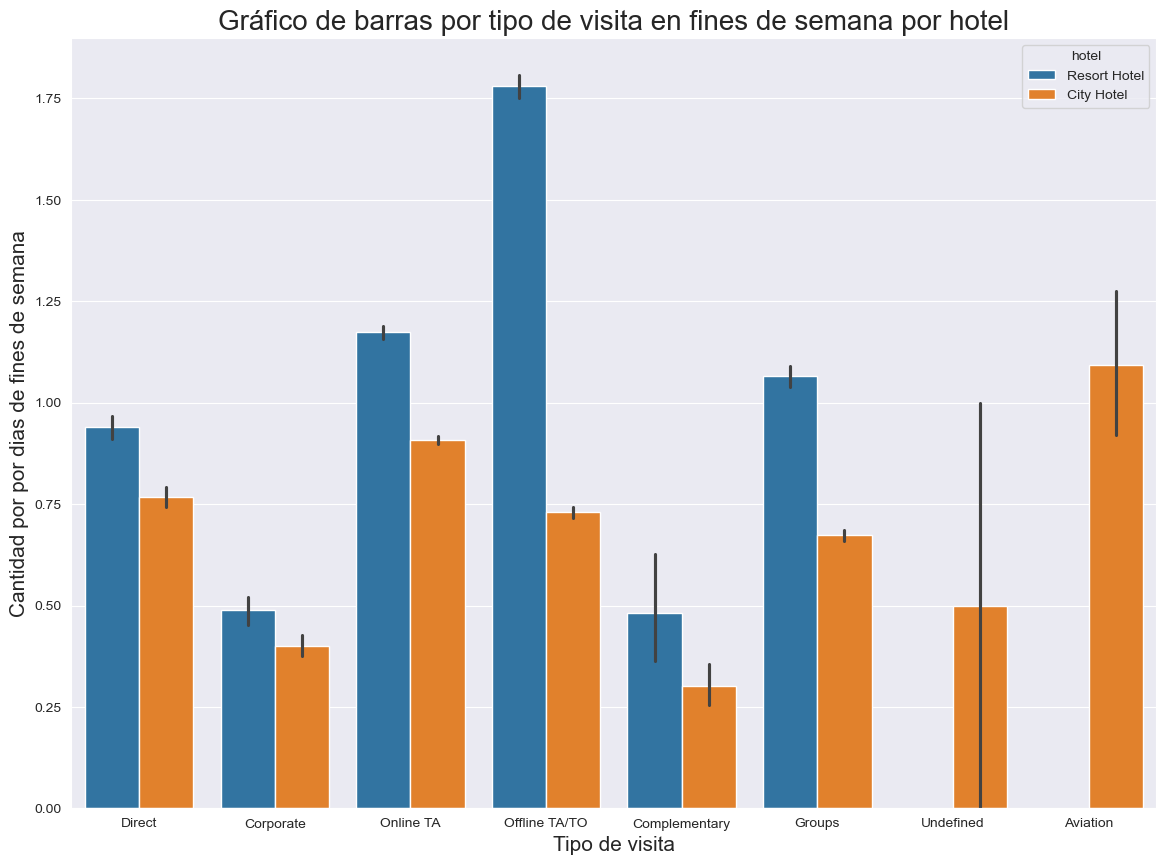

In [50]:
# crear figura y eje
fig, ax = plt.subplots(figsize=(14, 10))

# gráfco de barras
sns.barplot(data=df, x='market_segment', y='stays_in_weekend_nights', hue='hotel')

# titulos
ax.set_title('Gráfico de barras por tipo de visita en fines de semana por hotel', fontsize=20) 
ax.set_xlabel('Tipo de visita', fontsize=15)
ax.set_ylabel('Cantidad por por dias de fines de semana', fontsize=15)
sns.set_style("darkgrid")

plt.show()

En comparción al gráfico anterior, la cantidad de visitas en hoteles de ciudad disminuye durante los fines de semana, mientras que en los resort aumenta. También se nota una disminución en las reservaciones con motivos de trabajo y un aumento con motivos de offline.

### **3.3. Histograma de meses respecto al tipo de hotel**

In [45]:
# contar niños y adultos por tipo de hotel
df_grouped = df.groupby('hotel')['arrival_date_month'].sum().reset_index()
print(df_grouped)

          hotel                                 arrival_date_month
0    City Hotel  JulyJulyJulyJulyJulyJulyJulyJulyJulyJulyJulyJu...
1  Resort Hotel  JulyJulyJulyJulyJulyJulyJulyJulyJulyJulyJulyJu...


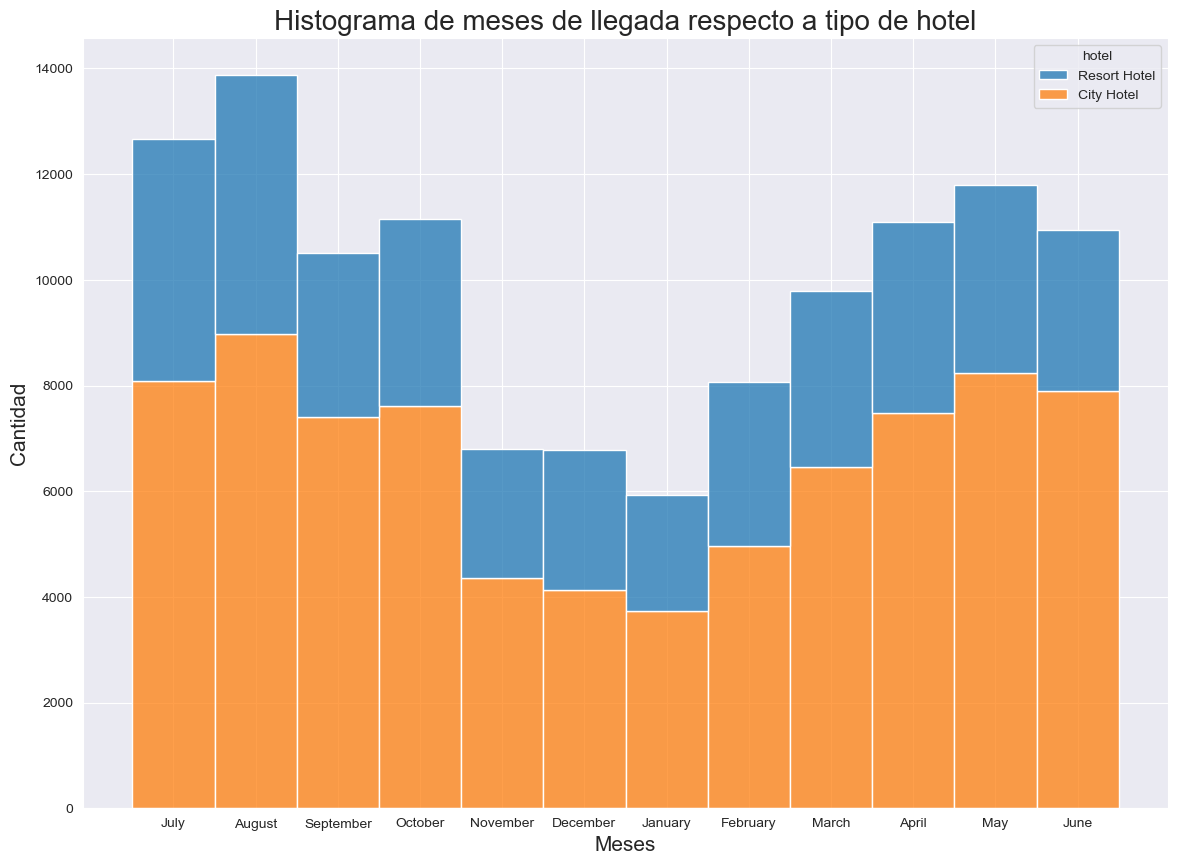

In [46]:
# crear figura y eje
fig, ax = plt.subplots(figsize=(14, 10))

# creacion de histograma de variables 
sns.histplot(data=df, x='arrival_date_month', hue='hotel', multiple='stack')
ax.set_title('Histograma de meses de llegada respecto a tipo de hotel', fontsize=20) 
ax.set_xlabel('Meses', fontsize=15)
ax.set_ylabel('Cantidad', fontsize=15)
sns.set_style("darkgrid")

plt.show()

Las reservas para hoteles del tipo resort son mayores a las reservas en hoteles de ciudad, presentandose una disminución en el trimestre de noviembre, diciembre y enero.

### **3.4. Análisis de tendencia**

In [47]:
# agrupar por mes 
df_grouped = df.groupby('hotel')['arrival_date_month'].sum().reset_index()
print(df_grouped)

          hotel                                 arrival_date_month
0    City Hotel  JulyJulyJulyJulyJulyJulyJulyJulyJulyJulyJulyJu...
1  Resort Hotel  JulyJulyJulyJulyJulyJulyJulyJulyJulyJulyJulyJu...


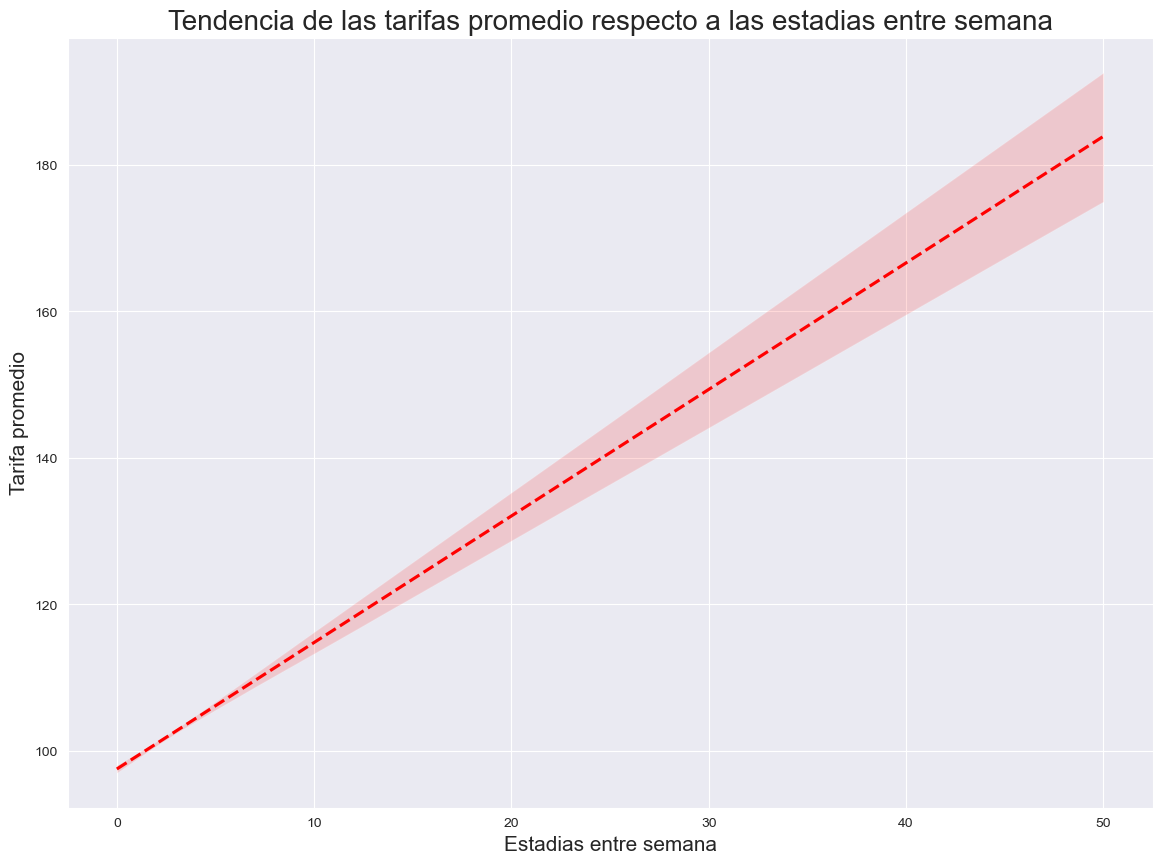

In [48]:
# crear figura y eje
fig, ax = plt.subplots(figsize=(14, 10))

# grafico
sns.regplot(data=df, x='stays_in_week_nights', y='adr', scatter=False, color='red', line_kws={'linestyle':'--'})
ax.set_title('Tendencia de las tarifas promedio respecto a las estadias entre semana', fontsize=20) 
ax.set_xlabel('Estadias entre semana', fontsize=15)
ax.set_ylabel('Tarifa promedio', fontsize=15)
sns.set_style("darkgrid")

plt.show()

El gráfico indica la tendencia positiva, es decir el aumento de las tarifas respecto a las estadías en los hoteles entre semana. 